<a href="https://colab.research.google.com/github/Raoolo/University/blob/main/MachineDeepLearning/Lab1/Es4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch, torchvision
from torch.utils.data import Dataset

In [92]:
class loadCIFAR(Dataset):
  def __init__(self, bs = 1):
    self.dataTrain = torchvision.datasets.CIFAR10(root='sample_data/', download=True, transform=torchvision.transforms.ToTensor())
    self.dataTest = torchvision.datasets.CIFAR10(root='sample_data/', download=True, train=False, transform=torchvision.transforms.ToTensor())
    self.trainLoader = torch.utils.data.DataLoader(self.dataTrain, batch_size=bs, shuffle=True)
    self.testLoader = torch.utils.data.DataLoader(self.dataTest, batch_size=bs, shuffle=True)

  def __len__(self):
    return len(self.dataTrain)    #non serve a nulla per ora?

  def __getitem__(self, index):
    return self.dataTrain[index][0], self.dataTrain[index][1], index


In [93]:
cif = loadCIFAR()

Files already downloaded and verified
Files already downloaded and verified


In [94]:
trainData = cif.dataTrain
testData = cif.dataTest
trainLoader = cif.trainLoader
testLoader =  cif.testLoader

In [95]:
trainData, testData, trainLoader, testLoader

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: sample_data/
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset CIFAR10
     Number of datapoints: 10000
     Root location: sample_data/
     Split: Test
     StandardTransform
 Transform: ToTensor(), <torch.utils.data.dataloader.DataLoader at 0x7fdb9b0d69a0>, <torch.utils.data.dataloader.DataLoader at 0x7fdb9d313e20>)

Plot some images

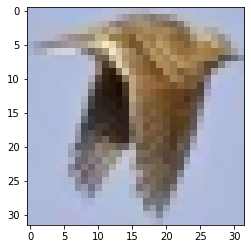

In [96]:
import numpy as np
import matplotlib.pyplot as plt
toPlot = trainData[123][0].numpy()
plt.imshow(np.transpose(toPlot, (1, 2, 0)))     #need to also change the order of the axes


In [97]:
labels_map = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5:
"dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

Plot random pics

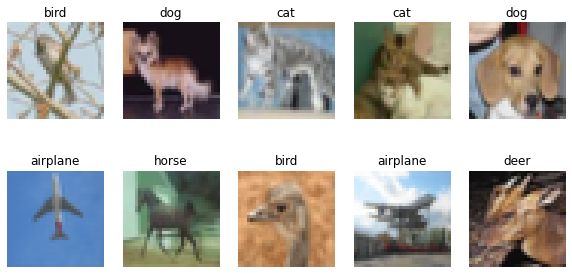

In [98]:
figure = plt.figure(figsize=(10, 5))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainData), size=(1,)).item()
    img, label = trainData[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    toPlot = img.numpy()
    plt.imshow(np.transpose(toPlot, (1, 2, 0)))     #need to also change the order of the axes
plt.show()

In [99]:
next(iter(trainLoader))

[tensor([[[[0.7608, 0.7373, 0.7373,  ..., 0.8706, 0.8784, 0.8902],
           [0.7569, 0.7333, 0.7333,  ..., 0.8549, 0.8588, 0.8667],
           [0.7608, 0.7373, 0.7451,  ..., 0.8549, 0.8510, 0.8588],
           ...,
           [0.5843, 0.5451, 0.4902,  ..., 0.7686, 0.7294, 0.7529],
           [0.5725, 0.5608, 0.4863,  ..., 0.8588, 0.8118, 0.7843],
           [0.5216, 0.5216, 0.4863,  ..., 0.8667, 0.7176, 0.7412]],
 
          [[0.8000, 0.7765, 0.7765,  ..., 0.9412, 0.9490, 0.9490],
           [0.7961, 0.7686, 0.7725,  ..., 0.9294, 0.9294, 0.9294],
           [0.7961, 0.7725, 0.7804,  ..., 0.9333, 0.9294, 0.9255],
           ...,
           [0.4745, 0.4549, 0.4157,  ..., 0.7020, 0.6314, 0.6353],
           [0.4588, 0.4667, 0.4039,  ..., 0.7529, 0.6784, 0.6471],
           [0.4314, 0.4314, 0.4118,  ..., 0.7490, 0.5843, 0.6078]],
 
          [[0.8039, 0.7961, 0.7882,  ..., 0.8745, 0.8667, 0.8706],
           [0.7961, 0.7804, 0.7725,  ..., 0.8431, 0.8314, 0.8314],
           [0.7843, 0.77

Plot a photo for each category

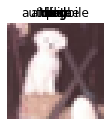

In [132]:
figure2 = plt.figure(figsize=(10, 5))
cols, rows = 5, 2
datas = []
labels = []
for i in range(1, cols * rows + 1):
  for data, label in trainLoader:
    if len(labels) < 10:
      if label.item() not in labels:
          labels.append(label.item())
          #datas.append(data)
          figure2.add_subplot(rows, cols, i)
          plt.title(labels_map[label.item()])
          plt.axis("off")
          toPlot = data.squeeze().numpy()
          plt.imshow(np.transpose(toPlot, (1, 2, 0)))
    else: 
      break
#torchvision.utils.make_grid(datas, labels)
plt.show()